# Visualização - Quantidade

Ao visualizarmos quantidades, estamos interessados em analisar a magnitude de algum conjunto de números. Por exemplo, podemos querer visualizar o número total de streams de diferentes tipos de música, ou o número total de artistas para cada tipo de gênero musical. Em todos esses casos, temos um conjunto de categorias (por exemplo, tipos de música e gêneros musicais) e um valor quantitativo para cada categoria. A visualização mais utilizada para este cenário é o gráfico de barras, que pode ter barras simples, agrupadas ou empilhadas. Em um gráfico de barras, cada entidade da variável categórica é representada como uma barra e o tamanho da barra representa seu valor numérico.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

In [2]:
# Lendo os dados
df_artistas = pd.read_table('../dataset/spotify_artists_info_complete.tsv',
                            encoding='utf-8')
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv',
                        encoding='utf-8')
df_charts = pd.read_table('../dataset/spotify_charts_complete.tsv',
                          encoding='utf-8')

In [3]:
# Junção dos dois DataFrames
data = pd.merge(df_hits, df_charts, on='song_id')

# Agrupando o DataFrame resultante pelo tipo de música e agregando os valores das variáveis numéricas
df = data.groupby(by=['song_type']).sum()
df = df.reset_index()
df.head()

,song_type,popularity,explicit,...,tempo,position,streams
0,Collaboration,355077,2014,...,552656.865,451801,41018982499
1,Solo,450823,2226,...,704102.936,593399,53777416027


In [4]:
# Criando o DataFrame
df = pd.DataFrame({
    'Tipos de Música': df.song_type,
    'Total de Streams': df.streams
})

## Gráfico de barra

Para exemplificar o conceito de gráfico de barras, considere o total de streams no Spotify para as músicas solo e colaborativas mais populares em 2020. Este tipo de dado é comumente visualizado com barras horizontais ou verticais. No exemplo a seguir, mostramos como construir um gráfico de barras simples usando Matplotlib e Seaborn. Especificamente, para cada tipo de música, desenhamos uma barra que começa em zero e se estende até o valor de streams.

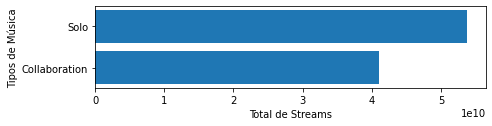

In [5]:
# Criando um gráfico de barras horizontal
fig, ax = plt.subplots()
ax.barh(y=df['Tipos de Música'],
    width=df['Total de Streams'])
ax.set_xlabel('Total de Streams')
ax.set_ylabel('Tipos de Música')
fig.set_size_inches(7, 1.5)

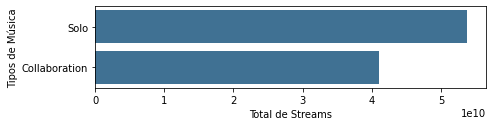

In [6]:
# Criando um gráfico de barras horizontal
sns.barplot(data=df,
    x="Total de Streams",
    y="Tipos de Música",
    order=['Solo', 'Collaboration'],
    color='#3274A1')
plt.gcf().set_size_inches(7, 1.5)

## Barras agrupadas
O exemplo anterior mostra como uma quantidade quantitativa varia em relação a uma variável categórica. Entretanto, frequentemente, estamos interessados em duas variáveis categóricas ao mesmo tempo. Considere, por exemplo, que queremos saber o total de streams de acordo com a expliciticidade das músicas, além do tipo da música. Podemos visualizar esse conjunto de dados com um gráfico de barras agrupadas. Em um gráfico de barras agrupadas, desenhamos um grupo de barras em cada posição ao longo do eixo x, determinado por uma variável categórica, e então desenhamos barras dentro de cada grupo de acordo com a outra variável categórica.

In [7]:
# Agrupando o DataFrame 'data' pelo tipo de música e a expliciticidade e agregando os valores das variáveis numéricas
df = data.groupby(by=['song_type', 'explicit']).sum()
df = df.reset_index()
df.head()

,song_type,explicit,popularity,...,tempo,position,streams
0,Collaboration,False,199093,...,294853.524,257806,21419775132
1,Collaboration,True,155984,...,257803.341,193995,19599207367
2,Solo,False,278235,...,427566.058,359947,34681135818
3,Solo,True,172588,...,276536.878,233452,19096280209


In [8]:
# Criando o DataFrame
df = pd.DataFrame({
    'Tipos de Música': df.song_type,
    'Total de Streams': df.streams,
    'Explícita': df.explicit,
})

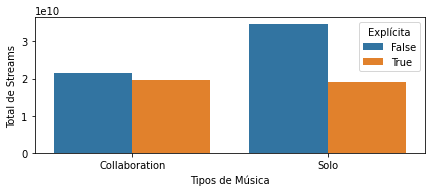

In [9]:
# Criando um gráfico de barras agrupadas
sns.barplot(
    x="Tipos de Música",
    y="Total de Streams",
    hue="Explícita", 
    data=df
)
plt.gcf().set_size_inches(7, 2.5)

## Conclusão

Este notebook apresentou como visualizar quantidades

O próximo notebook ([5.2.Distribuicao.ipynb](5.2.Distribuicao.ipynb)) apresenta como visualizar distribuições.